## Importando o pandas e carregando os dados

In [15]:
import pandas as pd
import os

In [16]:
from google.colab import drive
drive.mount('/content/drive')

caminho_arquivo = '/content/drive/MyDrive/Copy of SIC_Ativos_Grad_2000-2023.xlsx'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
df = pd.read_excel(caminho_arquivo)

## Lendo as primeiras linhas e informações da tabela

In [18]:
df.head(5)
df.head(-5)

,Ano,Campus,Unidade,Sexo,Cor/Raça,Renda Familiar,Nº Alunos Graduação
0,2000,Bauru,Faculdade de Odontologia de Bauru,F,Amarela,Não Informado,7
1,2000,Bauru,Faculdade de Odontologia de Bauru,F,Branca,Não Informado,53
2,2000,Bauru,Faculdade de Odontologia de Bauru,F,Indígena,Não Informado,1
3,2000,Bauru,Faculdade de Odontologia de Bauru,F,Não informada,Não Informado,140
4,2000,Bauru,Faculdade de Odontologia de Bauru,F,Parda,Não Informado,1
...,...,...,...,...,...,...,...
83690,2023,São Paulo,Reitoria da Universidade de São Paulo,M,Branca,Inferior a 1 SM,1
83691,2023,São Paulo,Reitoria da Universidade de São Paulo,M,Branca,Não Informado,9
83692,2023,São Paulo,Reitoria da Universidade de São Paulo,M,Não informada,Não Informado,2
83693,2023,São Paulo,Reitoria da Universidade de São Paulo,M,Parda,Entre 10 e 14 SM,2


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83700 entries, 0 to 83699
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Ano                  83700 non-null  int64 
 1   Campus               83700 non-null  object
 2   Unidade              83700 non-null  object
 3   Sexo                 83700 non-null  object
 4   Cor/Raça             83700 non-null  object
 5   Renda Familiar       83700 non-null  object
 6   Nº Alunos Graduação  83700 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 4.5+ MB


In [20]:
#retorna numero de linhas por colunas
df.shape


(83700, 7)

In [21]:
renomear_colunas = {
    'Nº Alunos Graduação': 'qt_alunos'
}

df.rename(columns=renomear_colunas)

,Ano,Campus,Unidade,Sexo,Cor/Raça,Renda Familiar,qt_alunos
0,2000,Bauru,Faculdade de Odontologia de Bauru,F,Amarela,Não Informado,7
1,2000,Bauru,Faculdade de Odontologia de Bauru,F,Branca,Não Informado,53
2,2000,Bauru,Faculdade de Odontologia de Bauru,F,Indígena,Não Informado,1
3,2000,Bauru,Faculdade de Odontologia de Bauru,F,Não informada,Não Informado,140
4,2000,Bauru,Faculdade de Odontologia de Bauru,F,Parda,Não Informado,1
...,...,...,...,...,...,...,...
83695,2023,São Paulo,Reitoria da Universidade de São Paulo,M,Parda,Entre 3 e 5 SM,3
83696,2023,São Paulo,Reitoria da Universidade de São Paulo,M,Parda,Entre 5 e 7 SM,1
83697,2023,São Paulo,Reitoria da Universidade de São Paulo,M,Parda,Entre 7 e 10 SM,1
83698,2023,São Paulo,Reitoria da Universidade de São Paulo,M,Parda,Não Informado,1


In [22]:
#transformar coluna Ano em string.
df['Ano'] = df['Ano'].astype(str)

In [23]:
df.describe(include='all')

,Ano,Campus,Unidade,Sexo,Cor/Raça,Renda Familiar,Nº Alunos Graduação
count,83700,83700,83700,83700,83700,83700,83700.000000
unique,24,7,43,2,6,54,NaN
top,2021,São Paulo,"Faculdade de Filosofia, Letras e Ciências Humanas",M,Branca,Não Informado,NaN
freq,6206,56938,5418,44552,29559,8568,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,15.601900
std,NaN,NaN,NaN,NaN,NaN,NaN,73.630757
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,9.000000


In [24]:
#cria uma variavel para tratar os dados
dft = df

## A coluna Renda Familiar possui 54 valores diferentes. É preciso agrupar esses valores para melhor entendimento.

In [25]:
df['Renda Familiar'].unique()

array(['Não Informado', 'De 10 a 13,9 SM.', 'De 2 a 2,9 SM.',
       'De 7 a 9,9 SM.',
       'Acima de 2 até 3 SM - de R$ 2.200,01 até R$ 3.300,00',
       'De 1 a 1,9 SM.', 'De 5 a 6,9 SM.', 'De 3 a 4,9 SM.',
       'De 15 a 19,9 SM.', 'Igual ou superior a 20 SM.',
       'Inferior a 1 SM.', 'Acima de 20 SM', 'Até 1 SM - até R$ 1.100,00',
       'De 10 a 14,9 SM.',
       'Acima de 15 até 20 SM - de R$ 15.675,01 até R$ 20.900,00',
       'Acima de 7 até 10 SM - de R$ 7.700,01 até R$ 11.000,00',
       'Inferior a 1 SM', 'Entre 10 e 14 SM', 'Entre 3 e 5 SM',
       'Entre 5 e 7 SM', 'Entre 7 e 10 SM', 'Entre 1 e 2 SM',
       'Acima de 15 até 20 SM - de R$ 16.500,01 até R$ 22.000,00',
       'De 14 a 19,9 SM.',
       'Acima de 7 até 10 SM - de R$ 8.484,01 até R$ 12.120,00',
       'Entre 14 e 20 SM', 'Entre 2 e 3 SM',
       'Acima de 30 SM até 50 SM - de R$ 33.000,01 até R$ 55.000,00',
       'Acima de 5 até 7 SM - de R$ 6.060,01 até R$ 8.484,00',
       'Acima de 7 até 10 SM - de R

### Agrupamento das faixas salariais, por critério de Salario Minimos (SM). Fica subentendido que valores diferentes de SMs correspondem a anos diferentes (anos antigos possuem um SM menor que anos mais recentes)

In [26]:
mapeamento_renda = {
    # Não Informado
    'Não Informado': 'Não Informado',

    # Até 1 SM
    'Inferior a 1 SM': 'Até 1 SM',
    'Inferior a 1 SM.': 'Até 1 SM',
    'Até 1 SM - até R$ 1.100,00': 'Até 1 SM',
    'Até 1 SM - até R$ 1.045,00': 'Até 1 SM',
    'Até 1 SM - até R$ 1.212,00': 'Até 1 SM',

    # 1-2 SM
    'De 1 a 1,9 SM.': 'Acima de 1 até 2 SM',
    'Entre 1 e 2 SM': 'Acima de 1 até 2 SM',
    'Acima de 1 até 2 SM - de R$ 1.100,01 até R$ 2.200,00': 'Acima de 1 até 2 SM',
    'Acima de 1 até 2 SM - de R$ 1.045,01 até R$ 2.090,00': 'Acima de 1 até 2 SM',
    'Acima de 1 até 2 SM - de R$ 1.212,01 até R$ 2.424,00': 'Acima de 1 até 2 SM',

    # 2-3 SM
    'De 2 a 2,9 SM.': 'Acima de 2 até 3 SM',
    'Entre 2 e 3 SM': 'Acima de 2 até 3 SM',
    'Acima de 2 até 3 SM - de R$ 2.200,01 até R$ 3.300,00': 'Acima de 2 até 3 SM',
    'Acima de 2 até 3 SM - de R$ 2.090,01 até R$ 3.135,00': 'Acima de 2 até 3 SM',
    'Acima de 2 até 3 SM - de R$ 2.424,01 até R$ 3.636,00': 'Acima de 2 até 3 SM',

    # 3-5 SM
    'De 3 a 4,9 SM.': 'Acima de 3 até 5 SM',
    'Entre 3 e 5 SM': 'Acima de 3 até 5 SM',
    'Acima de 3 até 5 SM - de R$ 3.135,01 até R$ 5.225,00': 'Acima de 3 até 5 SM',
    'Acima de 3 até 5 SM - de R$ 3.300,01 até R$ 5.500,00': 'Acima de 3 até 5 SM',
    'Acima de 3 até 5 SM - de R$ 3.636,01 até R$ 6.060,00': 'Acima de 3 até 5 SM',

    # 5-7 SM
    'De 5 a 6,9 SM.': 'Acima de 5 até 7 SM',
    'Entre 5 e 7 SM': 'Acima de 5 até 7 SM',
    'Acima de 5 até 7 SM - de R$ 5.225,01 até R$ 7.315,00': 'Acima de 5 até 7 SM',
    'Acima de 5 até 7 SM - de R$ 5.500,01 até R$ 7.700,00': 'Acima de 5 até 7 SM',
    'Acima de 5 até 7 SM - de R$ 6.060,01 até R$ 8.484,00': 'Acima de 5 até 7 SM',

    # 7-10 SM
    'De 7 a 9,9 SM.': 'Acima de 7 até 10 SM',
    'Entre 7 e 10 SM': 'Acima de 7 até 10 SM',
    'Acima de 7 até 10 SM - de R$ 7.315,01 até R$ 10.450,00': 'Acima de 7 até 10 SM',
    'Acima de 7 até 10 SM - de R$ 7.700,01 até R$ 11.000,00': 'Acima de 7 até 10 SM',
    'Acima de 7 até 10 SM - de R$ 8.484,01 até R$ 12.120,00': 'Acima de 7 até 10 SM',

    # 10-15 SM
    'De 10 a 13,9 SM.': 'Acima de 10 até 15 SM',
    'De 10 a 14,9 SM.': 'Acima de 10 até 15 SM',
    'Entre 10 e 14 SM': 'Acima de 10 até 15 SM',
    'Acima de 10 até 15 SM - de R$ 10.450,01 até R$ 15.675,00': 'Acima de 10 até 15 SM',
    'Acima de 10 até 15 SM - de R$ 11.000,01 até R$ 16.500,00': 'Acima de 10 até 15 SM',
    'Acima de 10 até 15 SM - de R$ 12.120,01 até R$ 18.180,00': 'Acima de 10 até 15 SM',

    # 15-20 SM
    'De 14 a 19,9 SM.': 'Acima de 15 até 20 SM',
    'De 15 a 19,9 SM.': 'Acima de 15 até 20 SM',
    'Entre 14 e 20 SM': 'Acima de 15 até 20 SM',
    'Acima de 15 até 20 SM - de R$ 15.675,01 até R$ 20.900,00': 'Acima de 15 até 20 SM',
    'Acima de 15 até 20 SM - de R$ 16.500,01 até R$ 22.000,00': 'Acima de 15 até 20 SM',
    'Acima de 15 até 20 SM - de R$ 18.180,01 até R$ 24.240,00': 'Acima de 15 até 20 SM',

    # 20-30 SM
    'Igual ou superior a 20 SM.': 'Acima de 20 até 30 SM',
    'Acima de 20 SM': 'Acima de 20 até 30 SM',
    'Acima de 20 SM até 30 SM - de R$ 20.900,01 até R$ 31.350,00': 'Acima de 20 até 30 SM',
    'Acima de 20 SM até 30 SM - de R$ 24.240,01 até R$ 36.360,00': 'Acima de 20 até 30 SM',
    'Acima de 20 SM até 30 SM - de R$ 22.000,01 até R$ 33.000,00': 'Acima de 20 até 30 SM',

    # 30-50 SM
    'Acima de 30 SM até 50 SM - de R$ 31.350,01 até R$ 52.250,00': 'Acima de 30 até 50 SM',
    'Acima de 30 SM até 50 SM - de R$ 33.000,01 até R$ 55.000,00': 'Acima de 30 até 50 SM',
    'Acima de 30 SM até 50 SM - de R$ 36.360,01 até R$ 60.600,00': 'Acima de 30 até 50 SM',

    # Acima de 50 SM
    'Acima de 50 SM - superior a R$ 52.250,00': 'Acima de 50 SM',
    'Acima de 50 SM - superior a R$ 55.000,00': 'Acima de 50 SM',
    'Acima de 50 SM - superior a R$ 60.600,00': 'Acima de 50 SM'
}

In [27]:
def padronizar_renda_completo(renda):
    if pd.isna(renda) or renda == '':
        return 'Não Informado'

    renda = str(renda).strip()

    # Procura correspondência exata
    if renda in mapeamento_renda:
        return mapeamento_renda[renda]

    # Se não encontrar correspondência exata, retorna 'Não Encontrado'
    return 'Não Encontrado'

In [28]:
# Aplicar a transformação
dft['Renda_Familiar_Padronizada'] = dft['Renda Familiar'].apply(padronizar_renda_completo)

In [29]:
# Verificar resultados
print("Contagem por faixa padronizada:")
print(dft['Renda_Familiar_Padronizada'].value_counts().sort_index())

Contagem por faixa padronizada:
Renda_Familiar_Padronizada
Acima de 1 até 2 SM       8405
Acima de 10 até 15 SM     9470
Acima de 15 até 20 SM     7292
Acima de 2 até 3 SM       8870
Acima de 20 até 30 SM     6255
Acima de 3 até 5 SM      10626
Acima de 30 até 50 SM      181
Acima de 5 até 7 SM       9360
Acima de 50 SM             101
Acima de 7 até 10 SM      9106
Até 1 SM                  5466
Não Informado             8568
Name: count, dtype: int64


In [30]:
dft.describe(include='all')

,Ano,Campus,Unidade,Sexo,Cor/Raça,Renda Familiar,Nº Alunos Graduação,Renda_Familiar_Padronizada
count,83700,83700,83700,83700,83700,83700,83700.000000,83700
unique,24,7,43,2,6,54,NaN,12
top,2021,São Paulo,"Faculdade de Filosofia, Letras e Ciências Humanas",M,Branca,Não Informado,NaN,Acima de 3 até 5 SM
freq,6206,56938,5418,44552,29559,8568,NaN,10626
mean,NaN,NaN,NaN,NaN,NaN,NaN,15.601900,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,73.630757,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN


## Coluna com Renda_Familiar_Padronizada com menos valores unicos, e melhor vizualização. Agora podemos apagar a coluna antiga (Renda Familiar).

In [31]:
del dft['Renda Familiar']

In [32]:
dft.describe(include='all')

,Ano,Campus,Unidade,Sexo,Cor/Raça,Nº Alunos Graduação,Renda_Familiar_Padronizada
count,83700,83700,83700,83700,83700,83700.000000,83700
unique,24,7,43,2,6,NaN,12
top,2021,São Paulo,"Faculdade de Filosofia, Letras e Ciências Humanas",M,Branca,NaN,Acima de 3 até 5 SM
freq,6206,56938,5418,44552,29559,NaN,10626
mean,NaN,NaN,NaN,NaN,NaN,15.601900,NaN
std,NaN,NaN,NaN,NaN,NaN,73.630757,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,3.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,9.000000,NaN


### Ainda temos 7 Campus diferentes. Precisamos dos dados apenas de São Paulo

In [33]:
# len(dft['Campus'].unique())
dft['Campus'].unique()

array(['Bauru', 'Piracicaba', 'Pirassununga', 'Ribeirão Preto',
       'São Carlos', 'São Paulo', 'Lorena'], dtype=object)

In [34]:
# Filtrar apenas campus São Paulo
dft = dft[dft['Campus'] == 'São Paulo']


#  Filtrar com query (mais legível)
# df_sp = df.query("Campus == 'São Paulo'")


In [35]:
dft.describe(include='all')

,Ano,Campus,Unidade,Sexo,Cor/Raça,Nº Alunos Graduação,Renda_Familiar_Padronizada
count,56938,56938,56938,56938,56938,56938.000000,56938
unique,24,1,26,2,6,NaN,12
top,2021,São Paulo,"Faculdade de Filosofia, Letras e Ciências Humanas",M,Branca,NaN,Acima de 3 até 5 SM
freq,3960,56938,5418,30298,19860,NaN,7013
mean,NaN,NaN,NaN,NaN,NaN,16.661983,NaN
std,NaN,NaN,NaN,NaN,NaN,84.121143,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,3.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,9.000000,NaN


### Ótimo, mesmo mantendo apenas o Campus de São Paulo a coluna de Renda_familiar_padronizada ainda possui todos os valores com aproximadamente 57k linhas.

In [36]:
dft.head(5)


,Ano,Campus,Unidade,Sexo,Cor/Raça,Nº Alunos Graduação,Renda_Familiar_Padronizada
161,2000,São Paulo,Escola de Comunicações e Artes,F,Amarela,1,Acima de 10 até 15 SM
162,2000,São Paulo,Escola de Comunicações e Artes,F,Amarela,1,Acima de 15 até 20 SM
163,2000,São Paulo,Escola de Comunicações e Artes,F,Amarela,1,Acima de 7 até 10 SM
164,2000,São Paulo,Escola de Comunicações e Artes,F,Amarela,45,Não Informado
165,2000,São Paulo,Escola de Comunicações e Artes,F,Branca,2,Acima de 20 até 30 SM


Criando gráfico de percentagens de cada cor/raça por ano

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


<Figure size 1600x800 with 0 Axes>

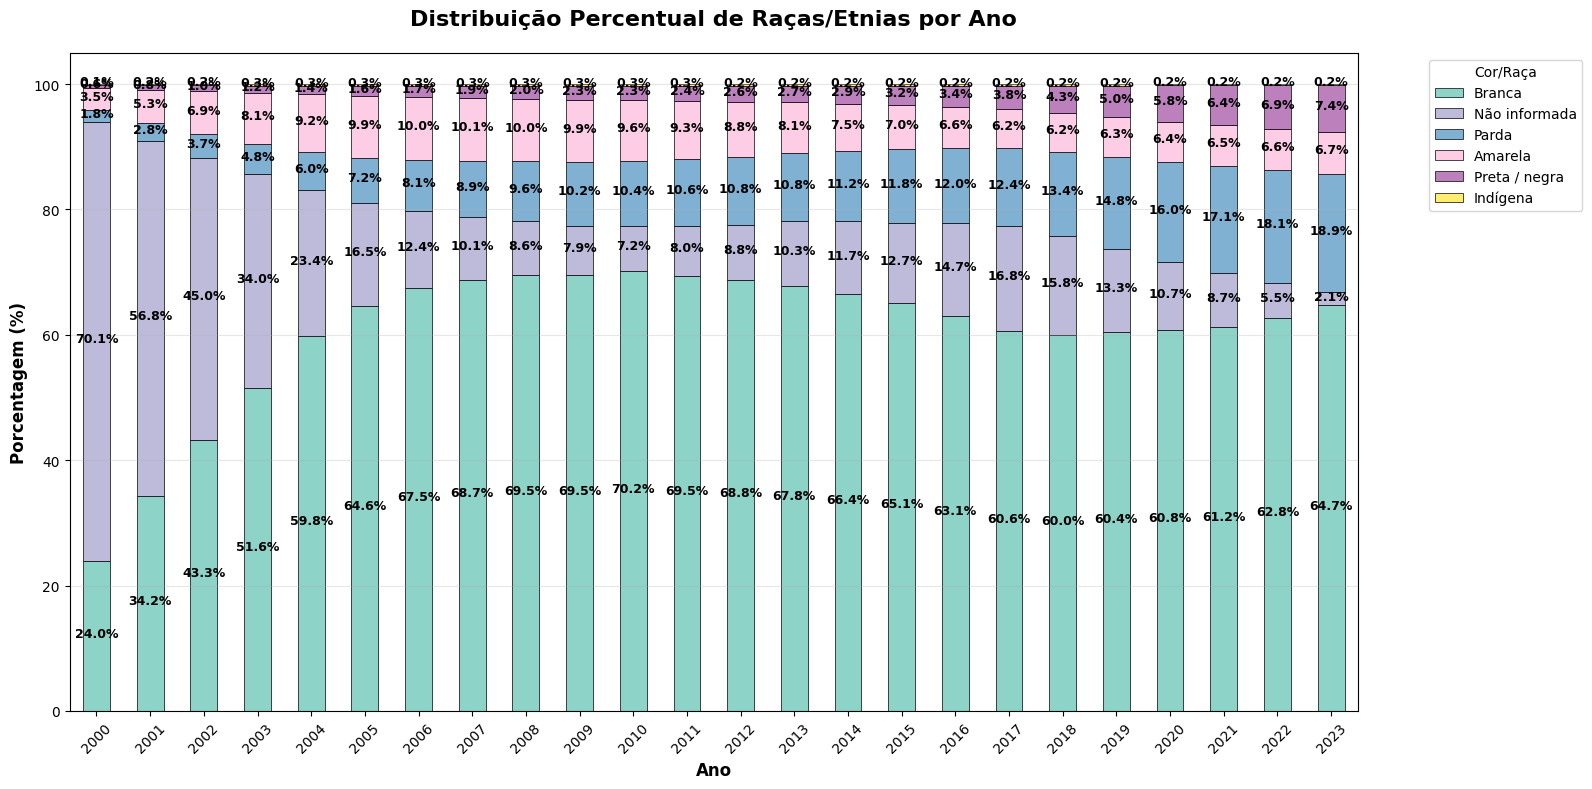

In [45]:
# Calcular o total de alunos por ano e raça
dft_agg = dft.groupby(['Ano', 'Cor/Raça'])['Nº Alunos Graduação'].sum().reset_index()

# Calcular porcentagens
total_por_ano = dft_agg.groupby('Ano')['Nº Alunos Graduação'].transform('sum')
dft_agg['Porcentagem'] = (dft_agg['Nº Alunos Graduação'] / total_por_ano) * 100

# Criar pivot table para o gráfico de barras empilhadas
pivot_raca = dft_agg.pivot(index='Ano', columns='Cor/Raça', values='Porcentagem').fillna(0)

# ⭐⭐ NOVA LINHA: Ordenar as colunas pela média (da maior para a menor) ⭐⭐
pivot_raca = pivot_raca[pivot_raca.mean().sort_values(ascending=False).index]

# Gráfico de barras empilhadas
plt.figure(figsize=(16, 8))

# Plotar as barras empilhadas
ax = pivot_raca.plot(kind='bar', stacked=True, figsize=(16, 8),
                     colormap='Set3', edgecolor='black', linewidth=0.5)

plt.title('Distribuição Percentual de Raças/Etnias por Ano',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.ylabel('Porcentagem (%)', fontsize=12, fontweight='bold')
plt.legend(title='Cor/Raça', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Adicionar valores nas barras em PRETO e mais legíveis
for container in ax.containers:
    # Ajustar o tamanho da fonte e cor para preto
    ax.bar_label(container, fmt='%.1f%%', label_type='center',
                 fontsize=9, color='black', fontweight='bold',
                 padding=2)  # padding para centralizar melhor

plt.tight_layout()
plt.show()